In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading and preparing data 

In [2]:
#importing the mnist data set to run it through the neural network
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#each image is a 28 x 28 pixel image
x_train[0].shape

(28, 28)

In [4]:
#the 2 dimensional array for the first element in the training batch
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

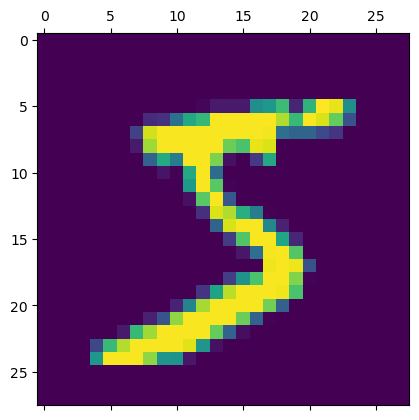

In [5]:
plt.matshow(x_train[0])

In [6]:
#each image has been labelled
y_train[0]

5

In [7]:
#scaling the matrices to improve model perfomance
x_train = x_train / 255
x_test = x_test / 255

In [8]:
#for each pixel in the image there will be a neuron to take care of it
#so the 2d array has to be flattened into a 1d array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [9]:
x_test_flattened.shape

(10000, 784)

In [10]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Creating a 1 layer neural network

In [21]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4699 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3040 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2668 - accuracy: 0.9260


In [22]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2680 - accuracy: 0.9270


[0.2680312395095825, 0.9269999861717224]

In [23]:
#the values in the array are the scores for each one of the neurons in the output layer of the nn.
#so there will be 10 values in the array representing the activation score for the corresponding neuron
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 4s 14ms/step


array([2.8248338e-02, 3.4116130e-07, 4.8528139e-02, 9.6994573e-01,
       1.9561269e-03, 8.7985128e-02, 1.8242057e-06, 9.9972087e-01,
       1.0925808e-01, 6.8665361e-01], dtype=float32)

In [24]:
#this numpy function returns the index of the maximum value in the array, this being the predicted number.
np.argmax(y_predicted[0])

7

In [25]:
#creating a new array with all the prediction outcomes to then make a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
#building a confusion matrix to see how well the model works
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    5,   10,    3,    2,    0],
       [   0, 1106,    3,    2,    0,    1,    4,    2,   17,    0],
       [   3,    7,  919,   19,    7,    5,   14,   11,   44,    3],
       [   3,    0,   18,  924,    0,   22,    2,   10,   25,    6],
       [   1,    1,    3,    1,  913,    0,   15,    4,   10,   34],
       [  10,    3,    2,   35,    6,  779,   17,    5,   29,    6],
       [   7,    3,    5,    1,    7,    9,  921,    2,    3,    0],
       [   1,    5,   21,    8,    8,    0,    0,  949,    5,   31],
       [   5,    5,    5,   16,    9,   24,    9,   10,  884,    7],
       [  10,    5,    1,   11,   24,    8,    0,   21,   11,  918]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

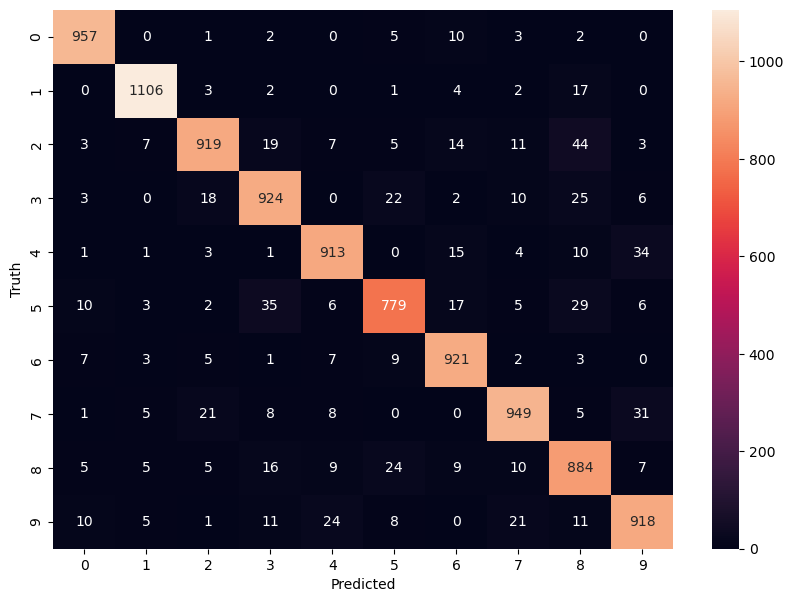

In [27]:
#using seaborn library to better visualize the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding a hidden layer to the neural network

### This will improve the models performance

In [28]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 

#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2728 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1236 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0874 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0517 - accuracy: 0.9841


In [29]:
#with just one more hidden layer the model has drastically improved its performance
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0988 - accuracy: 0.9702


[0.09878795593976974, 0.9702000021934509]

313/313 [==============================] - 3s 9ms/step


Text(95.72222222222221, 0.5, 'Truth')

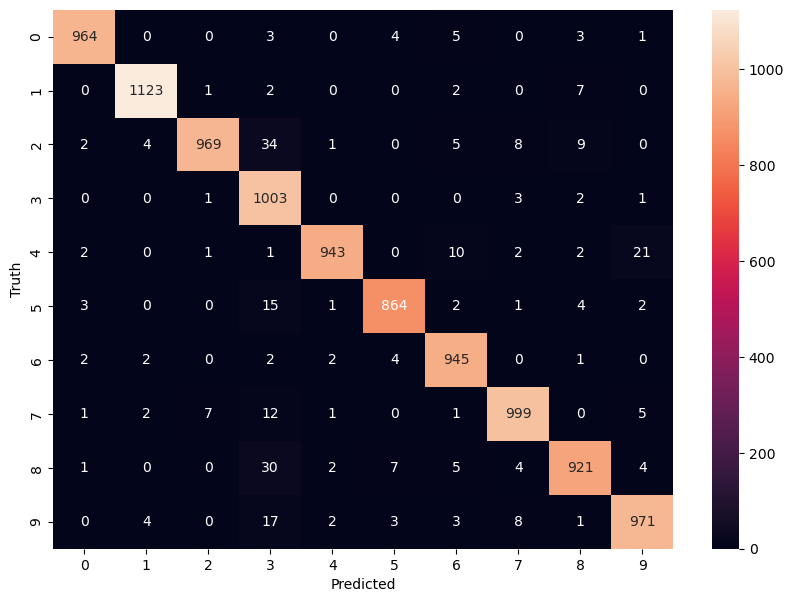

In [30]:
#replotting a confusion matrix for the new model
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#the model now shows a much higher accuracy predicting the right number